In [1]:
# loading the processed dataframe
import pandas as pd

columns = ['Data'+str(i) for i in range(1,1025)]
columns.append("Class")

df = pd.read_csv('recorded/all_data.csv',names=columns, header=None)

In [2]:
df.head(10)

,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8,Data9,Data10,...,Data1016,Data1017,Data1018,Data1019,Data1020,Data1021,Data1022,Data1023,Data1024,Class
0,1051,1047,1043,1033,1030,1025,1018,1015,1015,1012,...,1068,1066,1067,1062,1051,1040,1033,1036,1040,BELL
1,1043,1057,1069,1081,1083,1072,1068,1070,1069,1079,...,1071,1055,1049,1056,1066,1065,1065,1065,1057,BELL
2,1049,1058,1048,1056,1058,1062,1060,1059,1058,1053,...,1042,1038,1028,1026,1023,1025,1021,1017,1009,BELL
3,1021,1025,1019,997,989,997,1009,1022,1037,1049,...,1046,1047,1047,1039,1031,1034,1039,1049,1054,BELL
4,1052,1060,1066,1063,1055,1040,1025,1017,1014,1018,...,1077,1074,1065,1050,1041,1039,1030,1024,1019,BELL
5,995,988,980,977,978,975,976,981,992,998,...,1057,1066,1074,1078,1078,1067,1056,1051,1049,BELL
6,1031,1035,1037,1036,1036,1040,1049,1056,1065,1067,...,1048,1053,1057,1053,1052,1050,1044,1050,1061,BELL
7,1051,1048,1041,1035,1029,1029,1031,1027,1020,1026,...,1050,1044,1041,1046,1054,1064,1073,1076,1072,BELL
8,1000,998,1003,1000,999,999,1007,1010,1016,1021,...,1050,1049,1052,1055,1049,1044,1034,1029,1041,BELL
9,1040,1038,1045,1053,1054,1063,1066,1063,1063,1063,...,1071,1078,1080,1077,1072,1066,1052,1043,1041,BELL


In [3]:
df.shape

(164994, 1025)

In [4]:
df['Class'].value_counts()

Class
BELL           27499
NOISE          27499
CRYING_BABY    27499
ALARM          27499
RAIN           27499
ROOSTER        27499
Name: count, dtype: int64

In [2]:
# removing these 7443 rows with all zero except the class
df = df[df.apply(lambda row: (row == 0).sum() <= 0, axis=1)]

In [6]:
df['Class'].value_counts()

Class
NOISE          27499
BELL           26987
RAIN           26813
ROOSTER        26669
ALARM          26574
CRYING_BABY    26163
Name: count, dtype: int64

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Separate features and labels
X = df.iloc[:, :-1].values  # all rows, all columns except the last
y = df.iloc[:, -1].values   # class labels

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for RNN input: (samples, timesteps, features)
# Assuming each sound sample is already flattened and needs to be reshaped
# e.g., 1000 samples, 100 timesteps, 1 feature -> reshape accordingly

# Encode labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded, num_classes=6)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)


2025-05-08 18:29:47.639675: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-08 18:29:47.643614: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-08 18:29:47.652248: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746709187.665674   23304 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746709187.669519   23304 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746709187.680418   23304 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [8]:
# Print the mapping of labels to encoded numbers
label_mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
print(label_mapping)

{'ALARM': 0, 'BELL': 1, 'CRYING_BABY': 2, 'NOISE': 3, 'RAIN': 4, 'ROOSTER': 5}


In [9]:
df.shape

(160705, 1025)

In [10]:
X.shape

(160705, 1024)

# Model with size < 200 KB

In [18]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.InputLayer(input_shape=(1024,1)),

    layers.Conv1D(16, 3, activation='relu', padding='same'),
    layers.DepthwiseConv1D(3, activation='relu', padding='same'),
    layers.MaxPooling1D(pool_size=2),

    layers.Conv1D(16, 3, activation='relu', padding='same'),
    layers.DepthwiseConv1D(3, activation='relu', padding='same'),
    layers.MaxPooling1D(pool_size=2),

    layers.Conv1D(16, 3, activation='relu', padding='same'),
    layers.DepthwiseConv1D(3, activation='relu', padding='same'),
    layers.MaxPooling1D(pool_size=2),

    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

/home/sumanshu/MtechProject/sound_manipulation/env/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 1024, 16)       │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv1d                │ (None, 1024, 16)       │            64 │
│ (DepthwiseConv1D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 512, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 512, 16)        │           784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv1d_1              │ (None, 512, 16)        │            64 │
│ (DepthwiseConv1D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 256, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 256, 16)        │           784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv1d_2              │ (None, 256, 16)        │            64 │
│ (DepthwiseConv1D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 128, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,350 (520.90 KB)

 Trainable params: 133,350 (520.90 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(1024,)),
    layers.Reshape((32, 32, 1)),

    # Increase filters from 16 to 32
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Increase filters from 16 to 64
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Increase filters from 16 to 128
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Reshape((2048,)),  # 4x4x128 = 2048
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),  # Dropout added for regularization
    layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_6 (Reshape)             │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 32, 32, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_7 (Reshape)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,718 (1.36 MB)

 Trainable params: 355,718 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(1024,)),
    layers.Reshape((32, 32, 1)),

    layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),  # Output: 16x16x8

    layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),  # Output: 8x8x16

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),  # Output: 4x4x32

    layers.Reshape((512,)),  # 4x4x32 = 512
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_2 (Reshape)             │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 32)       │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_3 (Reshape)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,502 (87.90 KB)

 Trainable params: 22,502 (87.90 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(1024,)),
    
    # Reshape input to fit into a 2D Conv2D layer
    layers.Reshape((32, 32, 1)),  # 1024 becomes 32x32x1
    
    # One Conv2D + MaxPooling2D layer instead of multiple
    layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),  # Output: 16x16x16
    
    # Flatten and pass through a Dense layer
    layers.Flatten(),  # Flatten the 16x16x16 output to 4096
    layers.Dense(32, activation='relu'),  # Smaller dense layer
    
    # Output layer
    layers.Dense(6, activation='softmax')  # Assuming 6 output classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_3 (Reshape)             │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │       131,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131,462 (513.52 KB)

 Trainable params: 131,462 (513.52 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_test, y_test))

4125/4125 ━━━━━━━━━━━━━━━━━━━━ 39s 9ms/step - accuracy: 0.3676 - loss: 1.4879 - val_accuracy: 0.5923 - val_loss: 1.0365


In [6]:
import numpy as np

# Given array
arr = [
    1525.0, 1494.0, 1468.0, 1446.0, 1440.0, 1436.0, 1436.0, 1428.0, 1427.0, 1417.0, 
    1403.0, 1392.0, 1379.0, 1360.0, 1328.0, 1304.0, 1286.0, 1265.0, 1259.0, 1265.0, 
    1274.0, 1287.0, 1296.0, 1295.0, 1288.0, 1271.0, 1253.0, 1233.0, 1211.0, 1185.0, 
    1155.0, 1122.0, 1088.0, 1051.0, 1029.0, 1021.0, 1011.0, 1015.0, 1019.0, 1030.0, 
    1039.0, 1049.0, 1065.0, 1079.0, 1095.0, 1096.0, 1094.0, 1080.0, 1057.0, 1033.0, 
    1003.0, 971.0, 931.0, 888.0, 839.0, 791.0, 746.0, 708.0, 684.0, 669.0, 657.0, 
    654.0, 644.0, 635.0, 626.0, 625.0, 619.0, 617.0, 619.0, 618.0, 613.0, 613.0, 
    609.0, 614.0, 628.0, 644.0, 658.0, 672.0, 680.0, 695.0, 703.0, 709.0, 716.0, 
    711.0, 713.0, 699.0, 677.0, 656.0, 638.0, 637.0, 636.0, 642.0, 646.0, 649.0, 
    651.0, 645.0, 650.0, 655.0, 651.0, 647.0, 643.0, 623.0, 594.0, 570.0, 545.0, 
    531.0, 523.0, 523.0, 523.0, 520.0, 521.0, 514.0, 506.0, 495.0, 481.0, 460.0, 
    439.0, 402.0, 366.0, 334.0, 308.0, 286.0, 279.0, 279.0, 284.0, 311.0, 337.0, 
    373.0, 412.0, 450.0, 473.0, 493.0, 503.0, 512.0, 515.0, 511.0, 503.0, 495.0, 
    477.0, 465.0, 447.0, 434.0, 443.0, 435.0, 440.0, 451.0, 461.0, 485.0, 507.0, 
    540.0, 569.0, 592.0, 613.0, 612.0, 614.0, 626.0, 622.0, 636.0, 647.0, 638.0, 
    634.0, 627.0, 617.0, 624.0, 636.0, 650.0, 664.0, 664.0, 653.0, 627.0, 597.0, 
    575.0, 562.0, 563.0, 569.0, 572.0, 578.0, 578.0, 573.0, 571.0, 580.0, 605.0, 
    645.0, 679.0, 711.0, 738.0, 750.0, 757.0, 769.0, 783.0, 804.0, 829.0, 858.0, 
    882.0, 895.0, 906.0, 913.0, 927.0, 936.0, 949.0, 955.0, 960.0, 947.0, 922.0, 
    891.0, 866.0, 842.0, 828.0, 827.0, 828.0, 824.0, 827.0, 834.0, 842.0, 858.0, 
    883.0, 909.0, 928.0, 938.0, 946.0, 937.0, 926.0, 910.0, 892.0, 874.0, 844.0, 
    818.0, 787.0, 753.0, 737.0, 727.0, 726.0, 737.0, 750.0, 757.0, 763.0, 775.0, 
    783.0, 799.0, 817.0, 834.0, 855.0, 867.0, 862.0, 857.0, 846.0, 837.0, 835.0, 
    844.0, 852.0, 865.0, 877.0, 882.0, 882.0, 881.0, 880.0
]

# Normalize the array
arr_min = np.min(arr)
arr_max = np.max(arr)
normalized_arr = (arr - arr_min) / (arr_max - arr_min)

print(normalized_arr[:10])  # Displaying the first 10 normalized values


[1.         0.97512039 0.95425361 0.93659711 0.9317817  0.92857143
 0.92857143 0.92215088 0.92134831 0.91332263]


In [9]:
len(arr)

256

In [7]:
model.predict(normalized_arr)

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(32,), dtype=float32). Expected shape (None, 1024), but input has incompatible shape (32,)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32,), dtype=float32)
  • training=False
  • mask=None

In [ ]:
y_test[:10]

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.]])

In [23]:
import numpy as np
from sklearn.metrics import accuracy_score

# testing the accuracy of the model
y_pred = model.predict(X_test)

# Step 1: Convert y_pred to one-hot encoded predictions
one_hot_pred = np.zeros_like(y_pred)
one_hot_pred[np.arange(len(y_pred)), np.argmax(y_pred, axis=1)] = 1.0

# Step 2: Convert both y_true and y_pred to class indices
y_true_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(one_hot_pred, axis=1)

accuracy = accuracy_score(y_true_labels, y_pred_labels)
print(f"Model Accuracy: {accuracy:.2f}")

1005/1005 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Model Accuracy: 0.17


In [ ]:
import tensorflow as tf
# loading the model
# Load your trained model
model.predict([
    1525.0, 1494.0, 1468.0, 1446.0, 1440.0, 1436.0, 1436.0, 1428.0, 1427.0, 1417.0, 
    1403.0, 1392.0, 1379.0, 1360.0, 1328.0, 1304.0, 1286.0, 1265.0, 1259.0, 1265.0, 
    1274.0, 1287.0, 1296.0, 1295.0, 1288.0, 1271.0, 1253.0, 1233.0, 1211.0, 1185.0, 
    1155.0, 1122.0, 1088.0, 1051.0, 1029.0, 1021.0, 1011.0, 1015.0, 1019.0, 1030.0, 
    1039.0, 1049.0, 1065.0, 1079.0, 1095.0, 1096.0, 1094.0, 1080.0, 1057.0, 1033.0, 
    1003.0, 971.0, 931.0, 888.0, 839.0, 791.0, 746.0, 708.0, 684.0, 669.0, 657.0, 
    654.0, 644.0, 635.0, 626.0, 625.0, 619.0, 617.0, 619.0, 618.0, 613.0, 613.0, 
    609.0, 614.0, 628.0, 644.0, 658.0, 672.0, 680.0, 695.0, 703.0, 709.0, 716.0, 
    711.0, 713.0, 699.0, 677.0, 656.0, 638.0, 637.0, 636.0, 642.0, 646.0, 649.0, 
    651.0, 645.0, 650.0, 655.0, 651.0, 647.0, 643.0, 623.0, 594.0, 570.0, 545.0, 
    531.0, 523.0, 523.0, 523.0, 520.0, 521.0, 514.0, 506.0, 495.0, 481.0, 460.0, 
    439.0, 402.0, 366.0, 334.0, 308.0, 286.0, 279.0, 279.0, 284.0, 311.0, 337.0, 
    373.0, 412.0, 450.0, 473.0, 493.0, 503.0, 512.0, 515.0, 511.0, 503.0, 495.0, 
    477.0, 465.0, 447.0, 434.0, 443.0, 435.0, 440.0, 451.0, 461.0, 485.0, 507.0, 
    540.0, 569.0, 592.0, 613.0, 612.0, 614.0, 626.0, 622.0, 636.0, 647.0, 638.0, 
    634.0, 627.0, 617.0, 624.0, 636.0, 650.0, 664.0, 664.0, 653.0, 627.0, 597.0, 
    575.0, 562.0, 563.0, 569.0, 572.0, 578.0, 578.0, 573.0, 571.0, 580.0, 605.0, 
    645.0, 679.0, 711.0, 738.0, 750.0, 757.0, 769.0, 783.0, 804.0, 829.0, 858.0, 
    882.0, 895.0, 906.0, 913.0, 927.0, 936.0, 949.0, 955.0, 960.0, 947.0, 922.0, 
    891.0, 866.0, 842.0, 828.0, 827.0, 828.0, 824.0, 827.0, 834.0, 842.0, 858.0, 
    883.0, 909.0, 928.0, 938.0, 946.0, 937.0, 926.0, 910.0, 892.0, 874.0, 844.0, 
    818.0, 787.0, 753.0, 737.0, 727.0, 726.0, 737.0, 750.0, 757.0, 763.0, 775.0, 
    783.0, 799.0, 817.0, 834.0, 855.0, 867.0, 862.0, 857.0, 846.0, 837.0, 835.0, 
    844.0, 852.0, 865.0, 877.0, 882.0, 882.0, 881.0, 880.0
]
)

2025-05-08 11:10:58.029687: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


ValueError: Unrecognized data type: x=[1525.0, 1494.0, 1468.0, 1446.0, 1440.0, 1436.0, 1436.0, 1428.0, 1427.0, 1417.0, 1403.0, 1392.0, 1379.0, 1360.0, 1328.0, 1304.0, 1286.0, 1265.0, 1259.0, 1265.0, 1274.0, 1287.0, 1296.0, 1295.0, 1288.0, 1271.0, 1253.0, 1233.0, 1211.0, 1185.0, 1155.0, 1122.0, 1088.0, 1051.0, 1029.0, 1021.0, 1011.0, 1015.0, 1019.0, 1030.0, 1039.0, 1049.0, 1065.0, 1079.0, 1095.0, 1096.0, 1094.0, 1080.0, 1057.0, 1033.0, 1003.0, 971.0, 931.0, 888.0, 839.0, 791.0, 746.0, 708.0, 684.0, 669.0, 657.0, 654.0, 644.0, 635.0, 626.0, 625.0, 619.0, 617.0, 619.0, 618.0, 613.0, 613.0, 609.0, 614.0, 628.0, 644.0, 658.0, 672.0, 680.0, 695.0, 703.0, 709.0, 716.0, 711.0, 713.0, 699.0, 677.0, 656.0, 638.0, 637.0, 636.0, 642.0, 646.0, 649.0, 651.0, 645.0, 650.0, 655.0, 651.0, 647.0, 643.0, 623.0, 594.0, 570.0, 545.0, 531.0, 523.0, 523.0, 523.0, 520.0, 521.0, 514.0, 506.0, 495.0, 481.0, 460.0, 439.0, 402.0, 366.0, 334.0, 308.0, 286.0, 279.0, 279.0, 284.0, 311.0, 337.0, 373.0, 412.0, 450.0, 473.0, 493.0, 503.0, 512.0, 515.0, 511.0, 503.0, 495.0, 477.0, 465.0, 447.0, 434.0, 443.0, 435.0, 440.0, 451.0, 461.0, 485.0, 507.0, 540.0, 569.0, 592.0, 613.0, 612.0, 614.0, 626.0, 622.0, 636.0, 647.0, 638.0, 634.0, 627.0, 617.0, 624.0, 636.0, 650.0, 664.0, 664.0, 653.0, 627.0, 597.0, 575.0, 562.0, 563.0, 569.0, 572.0, 578.0, 578.0, 573.0, 571.0, 580.0, 605.0, 645.0, 679.0, 711.0, 738.0, 750.0, 757.0, 769.0, 783.0, 804.0, 829.0, 858.0, 882.0, 895.0, 906.0, 913.0, 927.0, 936.0, 949.0, 955.0, 960.0, 947.0, 922.0, 891.0, 866.0, 842.0, 828.0, 827.0, 828.0, 824.0, 827.0, 834.0, 842.0, 858.0, 883.0, 909.0, 928.0, 938.0, 946.0, 937.0, 926.0, 910.0, 892.0, 874.0, 844.0, 818.0, 787.0, 753.0, 737.0, 727.0, 726.0, 737.0, 750.0, 757.0, 763.0, 775.0, 783.0, 799.0, 817.0, 834.0, 855.0, 867.0, 862.0, 857.0, 846.0, 837.0, 835.0, 844.0, 852.0, 865.0, 877.0, 882.0, 882.0, 881.0, 880.0] (of type <class 'list'>)

In [15]:
# saving the model
model.save('final_complete.h5')

In [7]:
import tensorflow as tf
import numpy as np



# Representative dataset generator for calibration
def representative_data_gen():
    for _ in range(100):  # More = better calibration
        # Simulate normalized input data (mean 0.0, std 1.0 or between -1 and 1)
        data = np.random.uniform(0, 1, size=(1, 1024)).astype(np.float32)
        yield [data]

# Configure converter
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8

# Convert and save
tflite_model = converter.convert()
with open("model_int8.tflite", "wb") as f:
    f.write(tflite_model)

print("✅ Fully INT8 model saved as model_int8.tflite")


INFO:tensorflow:Assets written to: /tmp/tmpt1jfas4u/assets


INFO:tensorflow:Assets written to: /tmp/tmpt1jfas4u/assets


Saved artifact at '/tmp/tmpt1jfas4u'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1024), dtype=tf.float32, name='keras_tensor_12')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  125040671764368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  125032157215248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  125032157214672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  125032157216016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  125032157215440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  125032157216400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  125032157213904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  125032157213712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  125032157216592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  125032156120656: TensorSpec(shape=(), dtype=tf.resource, name=None)


/home/sumanshu/MtechProject/sound_manipulation/env/lib/python3.12/site-packages/tensorflow/lite/python/convert.py:854: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
W0000 00:00:1746709293.793508   23304 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1746709293.793539   23304 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.


✅ Fully INT8 model saved as model_int8.tflite


2025-05-08 18:31:33.793939: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpt1jfas4u
2025-05-08 18:31:33.794812: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-05-08 18:31:33.794823: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmpt1jfas4u
I0000 00:00:1746709293.803431   23304 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled
2025-05-08 18:31:33.804847: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-05-08 18:31:33.841033: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmpt1jfas4u
2025-05-08 18:31:33.853179: I tensorflow/cc/saved_model/loader.cc:471] SavedModel load for tags { serve }; Status: success: OK. Took 59241 microseconds.
2025-05-08 18:31:33.888855: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, s

In [8]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler


data = "0.714286 0.751880 0.759399 0.804511 0.759399 0.781955 0.789474 0.759399 0.789474 0.736842 0.714286 0.691729 0.646617 0.601504 0.593985 0.548872 0.518797 0.526316 0.451128 0.443609 0.398496 0.368421 0.360902 0.375940 0.345865 0.375940 0.360902 0.375940 0.375940 0.375940 0.368421 0.368421 0.368421 0.353383 0.413534 0.413534 0.421053 0.421053 0.436090 0.406015 0.428571 0.406015 0.428571 0.421053 0.398496 0.428571 0.406015 0.390977 0.421053 0.390977 0.406015 0.421053 0.443609 0.428571 0.436090 0.443609 0.421053 0.458647 0.451128 0.481203 0.511278 0.526316 0.548872 0.548872 0.578947 0.563910 0.563910 0.541353 0.541353 0.488722 0.481203 0.503759 0.458647 0.458647 0.473684 0.466165 0.458647 0.488722 0.496241 0.488722 0.511278 0.511278 0.496241 0.518797 0.511278 0.481203 0.488722 0.458647 0.436090 0.421053 0.443609 0.428571 0.473684 0.458647 0.451128 0.466165 0.481203 0.488722 0.518797 0.518797 0.488722 0.526316 0.533835 0.563910 0.571429 0.601504 0.609023 0.616541 0.646617 0.624060 0.593985 0.563910 0.526316 0.518797 0.511278 0.481203 0.466165 0.443609 0.406015 0.383459 0.338346 0.353383 0.345865 0.360902 0.390977 0.398496 0.398496 0.428571 0.481203 0.481203 0.533835 0.541353 0.526316 0.548872 0.518797 0.533835 0.556391 0.548872 0.609023 0.601504 0.639098 0.669173 0.601504 0.639098 0.676692 0.669173 0.676692 0.631579 0.616541 0.578947 0.526316 0.541353 0.518797 0.443609 0.481203 0.458647 0.466165 0.458647 0.406015 0.413534 0.398496 0.345865 0.375940 0.345865 0.308271 0.278196 0.240602 0.210526 0.203008 0.157895 0.172932 0.135338 0.127820 0.142857 0.142857 0.157895 0.172932 0.180451 0.233083 0.225564 0.248120 0.240602 0.240602 0.225564 0.218045 0.248120 0.270677 0.248120 0.308271 0.285714 0.338346 0.375940 0.345865 0.383459 0.413534 0.390977 0.466165 0.436090 0.428571 0.458647 0.436090 0.451128 0.443609 0.436090 0.473684 0.458647 0.451128 0.518797 0.481203 0.518797 0.533835 0.526316 0.571429 0.548872 0.503759 0.526316 0.458647 0.481203 0.421053 0.368421 0.383459 0.368421 0.345865 0.390977 0.368421 0.353383 0.368421 0.330827 0.345865 0.300752 0.278196 0.270677 0.278196 0.270677 0.293233 0.300752 0.308271 0.315789 0.338346 0.345865 0.360902 0.360902 0.375940 0.383459 0.406015 0.413534 0.398496 0.413534 0.428571 0.428571 0.466165 0.466165 0.473684 0.556391 0.541353 0.578947 0.563910 0.533835 0.578947 0.526316 0.518797 0.518797 0.481203 0.511278 0.518797 0.511278 0.556391 0.571429 0.571429 0.616541 0.593985 0.616541 0.639098 0.646617 0.699248 0.684211 0.706767 0.691729 0.676692 0.699248 0.721804 0.714286 0.781955 0.781955 0.796992 0.827068 0.796992 0.819549 0.827068 0.827068 0.857143 0.827068 0.827068 0.827068 0.812030 0.796992 0.781955 0.781955 0.834586 0.812030 0.804511 0.834586 0.834586 0.812030 0.827068 0.774436 0.781955 0.759399 0.721804 0.751880 0.744361 0.736842 0.729323 0.699248 0.721804 0.706767 0.714286 0.751880 0.736842 0.789474 0.827068 0.812030 0.842105 0.827068 0.842105 0.834586 0.804511 0.812030 0.759399 0.751880 0.774436 0.751880 0.736842 0.714286 0.676692 0.646617 0.601504 0.601504 0.616541 0.624060 0.639098 0.691729 0.751880 0.736842 0.781955 0.812030 0.834586 0.842105 0.872180 0.879699 0.842105 0.864662 0.879699 0.849624 0.894737 0.872180 0.894737 0.932331 0.969925 0.947368 0.992481 0.962406 1.000000 0.969925 0.932331 0.962406 0.947368 0.924812 0.909774 0.902256 0.909774 0.909774 0.864662 0.857143 0.842105 0.827068 0.857143 0.834586 0.789474 0.842105 0.819549 0.834586 0.834586 0.789474 0.827068 0.789474 0.766917 0.766917 0.729323 0.721804 0.774436 0.759399 0.766917 0.774436 0.789474 0.796992 0.804511 0.804511 0.819549 0.812030 0.812030 0.827068 0.804511 0.827068 0.842105 0.804511 0.796992 0.804511 0.774436 0.789474 0.789474 0.789474 0.774436 0.781955 0.774436 0.789474 0.781955 0.781955 0.781955 0.766917 0.804511 0.796992 0.789474 0.781955 0.774436 0.766917 0.729323 0.706767 0.706767 0.684211 0.646617 0.661654 0.646617 0.676692 0.676692 0.729323 0.699248 0.714286 0.759399 0.744361 0.744361 0.699248 0.684211 0.699248 0.699248 0.691729 0.714286 0.691729 0.669173 0.669173 0.639098 0.699248 0.691729 0.684211 0.706767 0.714286 0.736842 0.736842 0.721804 0.736842 0.729323 0.736842 0.744361 0.744361 0.781955 0.759399 0.766917 0.796992 0.774436 0.759399 0.751880 0.721804 0.751880 0.729323 0.729323 0.759399 0.706767 0.706767 0.684211 0.661654 0.646617 0.593985 0.586466 0.548872 0.541353 0.541353 0.563910 0.578947 0.578947 0.601504 0.571429 0.586466 0.556391 0.548872 0.541353 0.541353 0.541353 0.518797 0.533835 0.556391 0.533835 0.556391 0.586466 0.526316 0.571429 0.586466 0.563910 0.624060 0.593985 0.586466 0.593985 0.556391 0.578947 0.578947 0.578947 0.609023 0.616541 0.601504 0.639098 0.639098 0.654135 0.654135 0.616541 0.601504 0.586466 0.541353 0.526316 0.511278 0.458647 0.443609 0.428571 0.436090 0.428571 0.436090 0.436090 0.451128 0.488722 0.496241 0.496241 0.541353 0.541353 0.556391 0.571429 0.571429 0.518797 0.503759 0.503759 0.496241 0.481203 0.511278 0.496241 0.548872 0.541353 0.548872 0.563910 0.609023 0.586466 0.601504 0.556391 0.548872 0.609023 0.586466 0.609023 0.654135 0.616541 0.654135 0.639098 0.631579 0.654135 0.624060 0.601504 0.624060 0.593985 0.601504 0.616541 0.578947 0.616541 0.593985 0.571429 0.586466 0.563910 0.563910 0.586466 0.586466 0.578947 0.571429 0.571429 0.556391 0.563910 0.541353 0.511278 0.518797 0.503759 0.496241 0.503759 0.466165 0.503759 0.526316 0.518797 0.518797 0.533835 0.488722 0.533835 0.488722 0.488722 0.488722 0.488722 0.496241 0.488722 0.496241 0.533835 0.533835 0.563910 0.571429 0.541353 0.601504 0.609023 0.601504 0.609023 0.661654 0.624060 0.684211 0.729323 0.714286 0.721804 0.729323 0.729323 0.729323 0.729323 0.736842 0.736842 0.766917 0.729323 0.729323 0.759399 0.751880 0.744361 0.759399 0.714286 0.729323 0.729323 0.691729 0.684211 0.669173 0.601504 0.616541 0.571429 0.556391 0.533835 0.496241 0.496241 0.481203 0.488722 0.451128 0.458647 0.436090 0.443609 0.436090 0.451128 0.473684 0.466165 0.473684 0.496241 0.511278 0.518797 0.586466 0.586466 0.601504 0.616541 0.631579 0.639098 0.654135 0.646617 0.646617 0.639098 0.639098 0.631579 0.609023 0.631579 0.616541 0.601504 0.609023 0.616541 0.616541 0.616541 0.586466 0.586466 0.526316 0.518797 0.496241 0.496241 0.488722 0.481203 0.488722 0.496241 0.518797 0.533835 0.488722 0.526316 0.488722 0.481203 0.496241 0.443609 0.481203 0.518797 0.466165 0.518797 0.571429 0.571429 0.631579 0.646617 0.646617 0.684211 0.684211 0.714286 0.714286 0.706767 0.766917 0.774436 0.789474 0.827068 0.804511 0.812030 0.864662 0.849624 0.849624 0.902256 0.902256 0.917293 0.924812 0.894737 0.962406 0.947368 0.939850 0.932331 0.932331 0.932331 0.932331 0.932331 0.909774 0.894737 0.902256 0.879699 0.857143 0.879699 0.894737 0.872180 0.872180 0.857143 0.849624 0.864662 0.864662 0.812030 0.781955 0.759399 0.774436 0.729323 0.736842 0.736842 0.714286 0.699248 0.691729 0.669173 0.661654 0.654135 0.646617 0.593985 0.609023 0.609023 0.593985 0.609023 0.586466 0.548872 0.578947 0.578947 0.563910 0.586466 0.578947 0.578947 0.593985 0.586466 0.578947 0.571429 0.624060 0.624060 0.639098 0.676692 0.676692 0.684211 0.706767 0.714286 0.766917 0.781955 0.812030 0.834586 0.849624 0.842105 0.872180 0.872180 0.849624 0.842105 0.872180 0.879699 0.902256 0.924812 0.924812 0.917293 0.932331 0.894737 0.872180 0.902256 0.842105 0.834586 0.857143 0.804511 0.819549 0.872180 0.827068 0.894737 0.879699 0.842105 0.909774 0.917293 0.909774 0.924812 0.917293 0.902256 0.939850 0.909774 0.909774 0.954887 0.917293 0.954887 0.924812 0.887218 0.909774 0.857143 0.827068 0.827068 0.804511 0.774436 0.766917 0.751880 0.751880 0.721804 0.721804 0.729323 0.684211 0.714286 0.721804 0.706767 0.751880 0.766917 0.751880 0.774436 0.789474 0.781955 0.812030 0.729323 0.751880 0.751880 0.744361 0.759399 0.751880 0.744361 0.751880 0.751880 0.751880 0.721804 0.751880 0.729323 0.706767 0.706767 0.654135 0.624060 0.631579 0.571429 0.541353 0.541353 0.503759 0.518797 0.496241 0.503759 0.481203 0.458647 0.466165 0.443609 0.443609 0.451128 0.428571 0.443609 0.428571 0.428571 0.443609 0.451128 0.443609 0.436090 0.436090 0.458647 0.488722 0.473684 0.481203 0.511278 0.496241 0.488722 0.481203 0.458647 0.436090 0.473684 0.466165 0.503759 0.503759 0.503759 0.518797 0.526316 0.496241 0.473684 0.443609 0.421053 0.398496 0.360902 0.390977 0.368421 0.338346 0.338346 0.315789 0.315789 0.308271 0.270677 0.255639 0.218045 0.195489 0.203008 0.150376 0.142857 0.112782 0.105263 0.097744 0.060150 0.060150 0.037594 0.030075 0.037594 0.037594 0.000000 0.037594 0.052632 0.052632 0.067669 0.075188 0.112782 0.127820 0.105263 0.150376 0.135338 0.135338 0.150376 0.120301 0.127820 0.127820 0.082707 0.082707 0.112782 0.090226 0.120301 0.097744 0.105263 0.127820 0.127820 0.142857 0.127820 0.112782 0.120301 0.060150 0.082707 0.090226 0.052632 0.067669 0.105263 0.082707 0.112782 0.142857 0.142857 0.135338 0.150376 0.157895 0.172932 0.172932 0.187970 0.210526 0.195489 0.233083 0.233083 0.240602 0.278196 0.255639 0.278196 0.255639 0.270677 0.255639 0.270677 0.263158 0.293233 0.263158 0.300752 0.293233 0.270677 0.308271 0.248120 0.248120 0.255639 0.240602 0.240602 0.240602 0.203008 0.195489 0.187970 0.180451 0.180451 0.150376 0.135338 0.120301 0.127820 0.067669"
data = data.split(' ')
for i in range(len(data)):
    data[i]=float(data[i])

print(len(data))

1024


In [25]:
import numpy as np
import tensorflow as tf

# === Step 1: Load test data ===
# Replace with actual test dataset paths
x_test = X_test  # shape: (N, 1024)
y_test = y_test  # shape: (N, 6) for one-hot encoding

# Ensure x_test and y_test have the same length
assert len(x_test) == len(y_test), "Mismatch between x_test and y_test lengths"

# === Step 2: Load the quantized model ===
interpreter = tf.lite.Interpreter(model_path="model_int8.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

input_scale, input_zero_point = input_details[0]['quantization']
output_scale, output_zero_point = output_details[0]['quantization']

# === Step 3: Run inference and calculate accuracy ===
correct = 0
total = len(x_test)

for i in range(total):
    # Prepare input (normalize and quantize)
    input_data = x_test[i].astype(np.float32)  # ensure float32
    input_data = np.expand_dims(input_data, axis=0)  # shape: (1, 1024)
    
    # Quantize input data (to int8)
    input_int8 = (input_data / input_scale + input_zero_point).astype(np.int8)

    # Run inference
    interpreter.set_tensor(input_details[0]['index'], input_int8)
    interpreter.invoke()

    # Get prediction (dequantized output not needed for argmax)
    output = interpreter.get_tensor(output_details[0]['index'])  # shape: (1, num_classes)
    
    # Extract predicted label (class index)
    pred_label = np.argmax(output[0])  # classification assumption

    # Extract true label from one-hot encoded vector
    true_label = np.argmax(y_test[i])  # Find index of 1 in one-hot encoding

    # Compare with ground truth
    if pred_label == true_label:
        correct += 1

accuracy = correct / total
print(f"✅ Quantized model accuracy: {accuracy * 100:.2f}%")


/home/sumanshu/MtechProject/sound_manipulation/env/lib/python3.12/site-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


✅ Quantized model accuracy: 17.15%


In [9]:
import numpy as np
import tensorflow as tf

# === Step 1: Load the quantized TFLite model ===
interpreter = tf.lite.Interpreter(model_path="model_int8.tflite")
interpreter.allocate_tensors()

# Get model input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# input_scale, input_zero_point = input_details[0]['quantization']
# output_scale, output_zero_point = output_details[0]['quantization']
input_scale = 0.003922
input_zero_point = -128
output_scale = 0.003906
output_zero_point = -128

# === Step 2: Prepare your sample ===
# Replace this with your actual 1024-point sample
sample = np.array(data, dtype=np.float32)
sample = np.expand_dims(sample, axis=0)  # shape: (1, 1024)

# === Step 3: Quantize the input ===
sample_quantized = (sample / input_scale + input_zero_point).astype(np.int8)

# === Step 4: Run inference ===
interpreter.set_tensor(input_details[0]['index'], sample_quantized)
interpreter.invoke()

# === Step 5: Get the output ===
output = interpreter.get_tensor(output_details[0]['index'])  # shape: (1, num_classes)

# === Step 6: Extract the predicted class ===
predicted_class = np.argmax(output[0])
print(f"✅ Predicted class index: {predicted_class}")


✅ Predicted class index: 5


In [5]:
output_scale

0.00390625

In [6]:
output_zero_point

-128

In [8]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


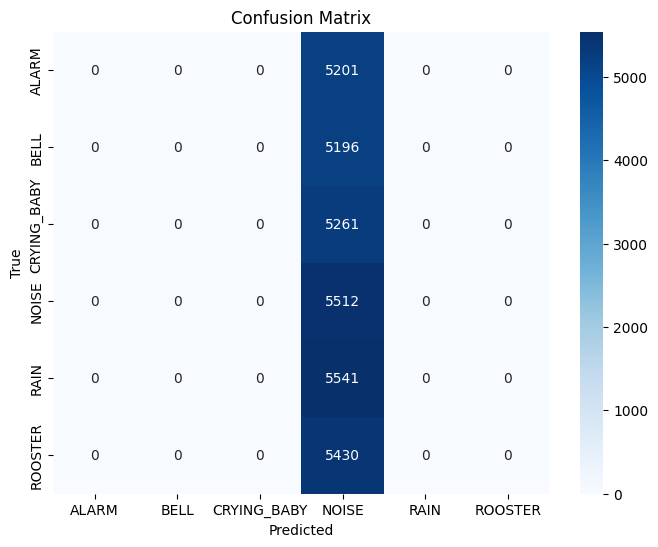

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

class_names = ['ALARM','BELL','CRYING_BABY','NOISE','RAIN','ROOSTER']

# Compute confusion matrix
y_pred = np.array([np.argmax(interpreter.get_tensor(output_details[0]['index'])[0]) for x in x_test])
y_true = np.array([np.argmax(label) for label in y_test])

cm = confusion_matrix(y_true, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


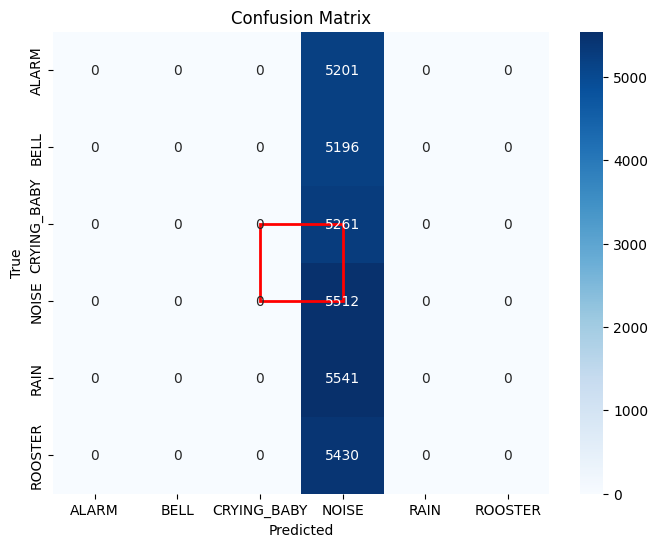

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define the class names based on your dataset
class_names = ['ALARM', 'BELL', 'CRYING_BABY', 'NOISE', 'RAIN', 'ROOSTER']

# Assuming y_true and y_pred are already defined
# y_true: true labels (one-hot encoded converted to indices)
# y_pred: predicted labels from the model

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define the index for the "NOISE" class
noise_class_index = class_names.index('NOISE')

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)

# Highlight the "NOISE" row and column with a red color border
plt.gca().add_patch(plt.Rectangle((noise_class_index-0.5, noise_class_index-0.5), 1, 1, fill=False, color="red", lw=2))

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [ ]:
import numpy as np

# Define class names
class_names = ['ALARM', 'BELL', 'CRYING_BABY', 'NOISE', 'RAIN', 'ROOSTER']

# Sample true labels and predictions (indices of the class names)
y_true = np.array([0, 1, 3, 4, 5, 3, 2, 4, 0, 3])  # Example true labels (e.g., 3 corresponds to 'NOISE')
y_pred = np.array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])  # Example predictions, all misclassified as 'NOISE'

# Define similar classes that you want to label as "NOISE" when predicted
similar_classes = [4, 5]  # For example, 'RAIN' (4) and 'ROOSTER' (5)

# Replace predictions of similar classes with "NOISE" (i.e., the index for 'NOISE' which is 3)
for i in range(len(y_pred)):
    if y_pred[i] in similar_classes:  # If the predicted class is 'RAIN' or 'ROOSTER'
        y_pred[i] = 3  # Set the prediction to "NOISE" (which is index 3)

# Now y_pred will have the predictions of 'RAIN' and 'ROOSTER' replaced by 'NOISE'
print("Updated predictions:", y_pred)

# Optionally, you could print a classification report or confusion matrix after the labeling
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=class_names))


In [5]:
y_test[0]

array([0., 0., 0., 1., 0., 0.])

In [31]:
X_test.shape

(32141, 1024)

In [32]:
y_test

'BELL'

In [27]:
print(pred_label)

2


In [27]:
# converting the model to tflite
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# saving the converted model
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpjb4x6cqa/assets


INFO:tensorflow:Assets written to: /tmp/tmpjb4x6cqa/assets


Saved artifact at '/tmp/tmpjb4x6cqa'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1024), dtype=tf.float32, name='keras_tensor_72')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  124548992855184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  124548992852112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  124548992856144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  124548992854992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  124548992854608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  124548992854032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  124548992854800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  124548992852496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  124548991884112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  124548991887760: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1746671095.834976   71083 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1746671095.836074   71083 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-05-08 07:54:55.838377: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpjb4x6cqa
2025-05-08 07:54:55.839695: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-05-08 07:54:55.839730: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmpjb4x6cqa
I0000 00:00:1746671095.849687   71083 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled
2025-05-08 07:54:55.851823: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-05-08 07:54:55.893252: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmpjb4x6cqa
2025-05-08 07:54:55.905719: I tensorflow/cc/saved_model/loader.cc:471] SavedModel 

In [24]:
# quantized model accuracy
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score

# Load TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Prepare test data and labels
# X_test: shape (num_samples, height, width, channels)
# y_true: true class labels (not one-hot), shape (num_samples,)
# If using one-hot, convert to labels: y_true = np.argmax(y_true_onehot, axis=1)

y_pred = []

for x in X_test:  # loop over test samples
    x_input = np.expand_dims(x, axis=0).astype(np.float32)  # Make batch of 1 and cast to int8

    interpreter.set_tensor(input_details[0]['index'], x_input)
    interpreter.invoke()
    output = interpreter.get_tensor(output_details[0]['index'])

    y_pred.append(np.argmax(output))

# Convert to numpy and compute accuracy
y_pred = np.array(y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"✅ TFLite Model Accuracy: {accuracy:.2f}")


/home/sumanshu/MtechProject/sound_manipulation/env/lib/python3.12/site-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

In [19]:
test_data_point = X_scaled[2000]

In [20]:
test_data_point = list(test_data_point)
for i in range(len(test_data_point)):
    test_data_point[i] = float(test_data_point[i])
print(test_data_point)

[0.5006788866259334, 0.5139784946236559, 0.5236285525446134, 0.49218120264388193, 0.4857048964837332, 0.5084855341845805, 0.5229513247073321, 0.5346336968207649, 0.5442997777072086, 0.553238015138772, 0.5599740301899042, 0.5311572700296736, 0.5593062867760916, 0.5378178835110746, 0.5043067049484884, 0.45493197278911557, 0.4630006788866259, 0.46917562724014333, 0.48727693324520815, 0.4646138965016927, 0.4636871508379889, 0.4855341845805721, 0.5066235366605053, 0.5278759023191523, 0.5336614798348682, 0.5406223717409587, 0.5421197857490667, 0.5220806423459592, 0.5557448126354909, 0.5296144380639869, 0.4980577605134268, 0.46088435374149656, 0.4747114731839782, 0.4758064516129032, 0.49124256444150693, 0.4736417862324681, 0.477817942819586, 0.5026668821722967, 0.5175600739371534, 0.5220396252495777, 0.5122261035249285, 0.4980656013456686, 0.49456257101119944, 0.46762087624367255, 0.5205946113347786, 0.5153404429860541, 0.5000844451950684, 0.47925170068027206, 0.5125594025797691, 0.5222222222

In [21]:
# Print the mapping of labels to encoded numbers
label_mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
print(label_mapping)

{'ALARM': 0, 'BELL': 1, 'CRYING_BABY': 2, 'NOISE': 3, 'RAIN': 4, 'ROOSTER': 5}


In [23]:
y[2000]

'BELL'

In [32]:
test_data_point=list(test_data_point)
for i in range(len(test_data_point)):
    test_data_point[i] = float(test_data_point[i])
print(test_data_point)

[0.4854039375424304, 0.49713261648745516, 0.511731658955717, 0.490891504110914, 0.49112717712783444, 0.5118797478584127, 0.5243376463339495, 0.526032867455076, 0.51603683709114, 0.5091673675357442, 0.5067359194935886, 0.4782684587187991, 0.519046144317126, 0.5050041017227235, 0.4835331869616619, 0.45527210884353736, 0.48404616429056346, 0.4989247311827957, 0.5160277594183741, 0.49862969530872153, 0.49983568846533033, 0.5194763213188944, 0.5320394331484904, 0.5344801105820919, 0.5246109876151159, 0.5204373423044575, 0.5180977114104852, 0.4899633443882004, 0.5284917931248064, 0.5128794093519278, 0.48927546022631313, 0.4585034013605441, 0.4850644942294636, 0.4991039426523297, 0.5125578321216127, 0.49459938739319675, 0.49572790009858697, 0.51786002909326, 0.5308071472581639, 0.5327906619566887, 0.522864401397269, 0.5160639192598822, 0.5132283720175296, 0.4833304241577937, 0.5221430783524311, 0.5041837571780148, 0.4820131734504307, 0.4532312925170068, 0.48031228784792934, 0.4931899641577061

In [1]:
import pandas as pd

pd.read_csv('recorded/all_data.csv')

KeyboardInterrupt: 